# **1. Download Datasets Dari Kaggle**

In [1]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
! unzip -o -q imdb-dataset-of-50k-movie-reviews.zip -d Data
! rm imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other




  0%|          | 0.00/25.7M [00:00<?, ?B/s]
100%|██████████| 25.7M/25.7M [00:00<00:00, 508MB/s]


# **2. Import Library Awal**

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time # Untuk mengukur waktu pra-pemrosesan

# **3. Load Dataset**

In [3]:
datasets_folder = 'Data'
datasets_file = 'IMDB Dataset.csv'
datasets_path = f'{datasets_folder}/{datasets_file}'

try:
    df = pd.read_csv(datasets_path)
    print(f"File dataset {datasets_file} berhasil dimuat dari folder {datasets_folder}.")
except FileNotFoundError:
    print(f"Tidak ada file {datasets_file} di dalam folder {datasets_folder}.")


File dataset IMDB Dataset.csv berhasil dimuat dari folder Data.


# **4. Semua Informasi datasets**

In [4]:
print("\nBaris 5 pertama dari dataset :\n")
df.head()


Baris 5 pertama dari dataset :



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
print("\nInformasi Dataset :\n")
df.info()


Informasi Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
print("\nStatistik Deskriptif Dataset :\n")
display(df.describe())



Statistik Deskriptif Dataset :



,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# **5. Cek Nilai Yang Hilang Dari Datasets**

In [7]:
print("\nJumlah Missing Values di Setiap Kolom :\n")
print(df.isnull().sum())


Jumlah Missing Values di Setiap Kolom :

review       0
sentiment    0
dtype: int64


In [8]:
# Jika ada missing values, hapus baris yang mengandung nilai kosong
df_cleaned = df.dropna()

In [9]:
print("\nDataset setelah menghapus missing values:")
print(df_cleaned.info())  # Cek kembali apakah missing values sudah hilang


Dataset setelah menghapus missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


#### NB : `Tidak Ada Missing Values`

# **6. Pre-Processing**

In [10]:
# Unduh resource NLTK yang diperlukan.
print("Memeriksa dan mengunduh resource NLTK yang diperlukan...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print("Resource NLTK siap.")

# Inisialisasi Tool Pra-pemrosesan
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Definisikan Fungsi Pra-pemrosesan
def preprocess_text(text):
    # 1. Lowercasing : mengubah semua karakter menjadi lowercase
    text = text.lower()

    # 2. Pembersihan Teks
    text = re.sub(r'<.*?>', '', text)    # Menghapus tag HTML (e.g., <br />, <p>)
    text = re.sub(r'[^a-z\s]', '', text) # Menghapus tanda baca, angka, dan karakter non-alfabet (hanya mempertahankan huruf dan spasi)

    # 3. Tokenisasi : Memisahkan teks menjadi kata-kata individual berdasarkan spasi
    words = text.split()

    # 4. Stopword Removal & 5. Lemmatization
    processed_words = []
    for word in words:
        # Hanya proses kata yang bukan stopword
        if word not in stop_words:
            # Mengubah kata ke bentuk dasar (lemma)
            processed_words.append(lemmatizer.lemmatize(word))

    # Menggabungkan kembali kata-kata menjadi satu string
    return ' '.join(processed_words)

print("\nFungsi `preprocess_text` berhasil didefinisikan.\n")



Memeriksa dan mengunduh resource NLTK yang diperlukan...
Resource NLTK siap.

Fungsi `preprocess_text` berhasil didefinisikan.



In [11]:
# Proses Pra-pemrosesan
print("\nMenerapkan pra-pemrosesan ke seluruh kolom 'review' di DataFrame...")

start_time = time.time()
df['processed_review'] = df['review'].apply(preprocess_text)
end_time = time.time()

print(f"\nPra-pemrosesan selesai dalam {end_time - start_time:.2f} detik!")


Menerapkan pra-pemrosesan ke seluruh kolom 'review' di DataFrame...

Pra-pemrosesan selesai dalam 36.42 detik!


In [12]:
# Hasil Pra-pemrosesan
print("\nBerikut 5 baris pertama DataFrame setelah pra-pemrosesan:")
# Tampilkan kolom asli, kolom yang diproses, dan sentimen
print(df[['review', 'processed_review', 'sentiment']].head())

print("\nDistribusi sentimen setelah pra-pemrosesan:")
print(df['sentiment'].value_counts())


Berikut 5 baris pertama DataFrame setelah pra-pemrosesan:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review sentiment  
0  one reviewer mentioned watching oz episode you...  positive  
1  wonderful little production filming technique ...  positive  
2  thought wonderful way spend time hot summer we...  positive  
3  basically there family little boy jake think t...  negative  
4  petter matteis love time money visually stunni...  positive  

Distribusi sentimen setelah pra-pemrosesan:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


# **7. Vektorisasi Teks: Mengubah Kata Menjadi Angka**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
# min_df: mengabaikan kata-kata yang frekuensinya terlalu rendah (muncul di kurang dari 5 dokumen)
# max_df: mengabaikan kata-kata yang frekuensinya terlalu tinggi (muncul di lebih dari 80% dokumen)
# stopwords: tidak perlu diatur karena kita sudah menghapusnya di pra-pemrosesan
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
print("Memulai proses vektorisasi menggunakan TF-IDF...")

# Menerapkan TfidfVectorizer pada kolom 'processed_review'
# fit_transform: mempelajari kosakata dari data dan mengubah teks menjadi matriks TF-IDF
X = tfidf_vectorizer.fit_transform(df['processed_review'])

# Tampilkan ukuran matriks hasil vektorisasi
print("\nVektorisasi teks selesai!")
print(f"Bentuk matriks fitur (X): {X.shape}")
print(f"Jumlah fitur (kata unik) yang dihasilkan: {X.shape[1]}")

# Mengubah kolom 'sentiment' menjadi label numerik (0 dan 1)
# 'negative' akan menjadi 0, 'positive' akan menjadi 1
df['sentiment_encoded'] = df['sentiment'].apply(lambda x_1: 1 if x_1 == 'positive' else 0)
Y = df['sentiment_encoded']

print(f"Bentuk vektor label (Y): {Y.shape}")
print("\nVektorisasi selesai! Data teks sekarang dalam format numerik.")
print("\nMatriks fitur (X) dan vektor label (Y) sudah siap.")

Memulai proses vektorisasi menggunakan TF-IDF...

Vektorisasi teks selesai!
Bentuk matriks fitur (X): (50000, 36141)
Jumlah fitur (kata unik) yang dihasilkan: 36141
Bentuk vektor label (Y): (50000,)

Vektorisasi selesai! Data teks sekarang dalam format numerik.

Matriks fitur (X) dan vektor label (Y) sudah siap.


# **8. Training Model**

### **A. Training Model Support Vector Machine (SVM)**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import time

# --- 1. Pembagian Data Pelatihan dan Pengujian ---
# Membagi dataset menjadi training (80%) dan testing (20%)
# random_state=42 memastikan hasil pembagian konsisten setiap kali kode dijalankan
print("Memulai pembagian dataset menjadi data pelatihan dan pengujian...")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Ukuran data pelatihan (X_train): {X_train.shape}")
print(f"Ukuran label pelatihan (y_train): {y_train.shape}")
print(f"Ukuran data pengujian (X_test): {X_test.shape}")
print(f"Ukuran label pengujian (y_test): {y_test.shape}")
print("Pembagian dataset selesai.")

# --- 2. Pelatihan Model Support Vector Machine (SVM) ---
# Menggunakan LinearSVC karena efisien untuk dataset besar dan fitur yang banyak
print("\nMemulai pelatihan model Support Vector Machine (LinearSVC)...")
start_time = time.time()

svm_model = LinearSVC(random_state=42, dual=False) # dual=False direkomendasikan untuk n_samples > n_features
svm_model.fit(X_train, y_train)

end_time = time.time()
print(f"Pelatihan model selesai dalam {end_time - start_time:.2f} detik!")

# --- 3. Evaluasi Model ---
print("\nMelakukan evaluasi model pada data pengujian...")
y_pred_svm = svm_model.predict(X_test)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'positive']))

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi Model: {accuracy:.4f}")

print("\nModel SVM telah dilatih dan dievaluasi.")

Memulai pembagian dataset menjadi data pelatihan dan pengujian...
Ukuran data pelatihan (X_train): (40000, 36141)
Ukuran label pelatihan (y_train): (40000,)
Ukuran data pengujian (X_test): (10000, 36141)
Ukuran label pengujian (y_test): (10000,)
Pembagian dataset selesai.

Memulai pelatihan model Support Vector Machine (LinearSVC)...
Pelatihan model selesai dalam 2.41 detik!

Melakukan evaluasi model pada data pengujian...

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.90      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Akurasi Model: 0.8941

Model SVM telah dilatih dan dievaluasi.


### **B. MODEL Artificial Neural Network dengan Keras (ANN)**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time

# --- 1. Pelatihan Model Artificial Neural Network (ANN) ---
# Menggunakan Keras Sequential API untuk membuat jaringan saraf sederhana
print("\nMemulai pelatihan model Artificial Neural Network (ANN)...")
start_time = time.time()

model_ann = Sequential()
model_ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.5))  # Mengurangi overfitting
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(1, activation='sigmoid'))  # Untuk klasifikasi biner

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Latih model ANN dengan data pelatihan
history_ann = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

end_time = time.time()
print(f"Pelatihan model ANN selesai dalam {end_time - start_time:.2f} detik!")

# --- 2. Evaluasi Model ANN ---
print("\nMelakukan evaluasi model ANN pada data pengujian...")
y_pred_ann = (model_ann.predict(X_test) > 0.5).astype("int32")

print("\nLaporan Klasifikasi ANN:")
print(classification_report(y_test, y_pred_ann, target_names=['negative', 'positive']))

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Akurasi Model ANN: {accuracy_ann:.4f}")

print("\nModel ANN telah dilatih dan dievaluasi.")



Memulai pelatihan model Artificial Neural Network (ANN)...
Epoch 1/10


InvalidArgumentError: Graph execution error:

TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 265, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 143, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 150, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\data_adapter.py", line 512, in py_method
    return [slice_array(inp) for inp in flat_inputs]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\data_adapter.py", line 512, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]
            ^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\data_adapter.py", line 508, in slice_array
    return training_utils.slice_arrays(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
                ~^^^^^^^^^^^

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1172]

### **C. MODEL XGBClassifier (XGBoost)**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# --- 1. Pelatihan Model XGBoost ---
# XGBoost adalah algoritma boosting yang sangat efektif untuk klasifikasi
print("\nMemulai pelatihan model XGBoost...")
start_time = time.time()

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

end_time = time.time()
print(f"Pelatihan model XGBoost selesai dalam {end_time - start_time:.2f} detik!")

# --- 2. Evaluasi Model XGBoost ---
print("\nMelakukan evaluasi model XGBoost pada data pengujian...")
y_pred_xgb = model_xgb.predict(X_test)

print("\nLaporan Klasifikasi XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['negative', 'positive']))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi Model XGBoost: {accuracy_xgb:.4f}")

print("\nModel XGBoost telah dilatih dan dievaluasi.")



Memulai pelatihan model XGBoost...


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [21:54:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## CONFUSION MATRIKS

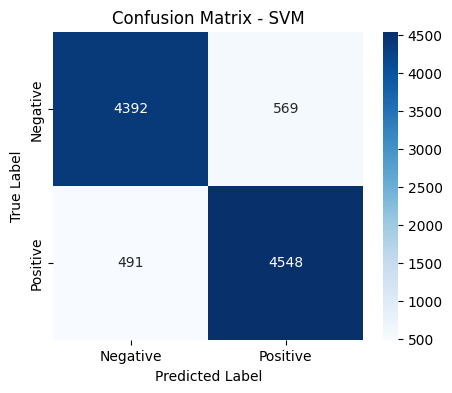

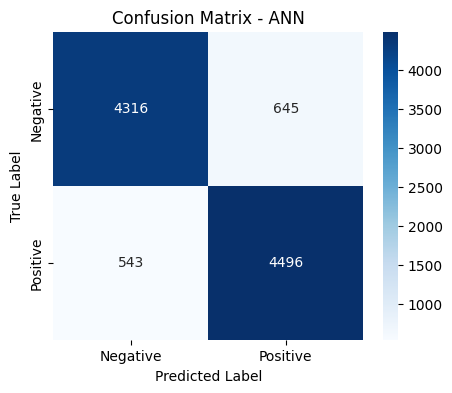

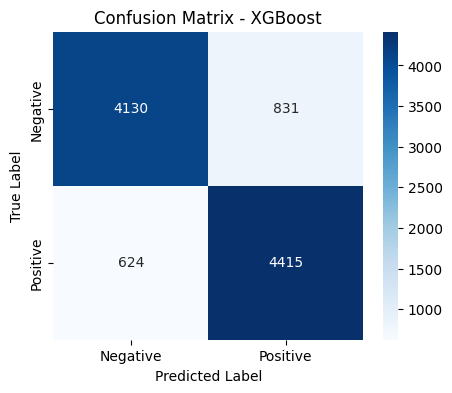

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# --- Confusion Matrix SVM ---
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion(cm_svm, "SVM")

# --- Confusion Matrix ANN ---
cm_ann = confusion_matrix(y_test, y_pred_ann)
plot_confusion(cm_ann, "ANN")

# --- Confusion Matrix XGBoost ---
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion(cm_xgb, "XGBoost")

## Evaluasi Perbandingan Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Fungsi bantu evaluasi model
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Kumpulkan hasil evaluasi
results = [
    evaluate_model("SVM", y_test, y_pred_svm),
    evaluate_model("ANN", y_test, y_pred_ann),
    evaluate_model("XGBoost", y_test, y_pred_xgb)
]

# Tampilkan hasil evaluasi dalam DataFrame
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

print("📊 Hasil Evaluasi Perbandingan Model:\n")
print(df_results_sorted)

# Simpulkan model terbaik
best_model = df_results_sorted.iloc[0]
print(f"\n✅ Model terbaik berdasarkan F1-Score adalah: **{best_model['Model']}**")
print(f"Akurasi: {best_model['Accuracy']:.4f} | F1-Score: {best_model['F1-Score']:.4f}")


📊 Hasil Evaluasi Perbandingan Model:

     Model  Accuracy  Precision    Recall  F1-Score
0      SVM    0.8940   0.888802  0.902560  0.895628
1      ANN    0.8812   0.874538  0.892241  0.883301
2  XGBoost    0.8545   0.841594  0.876166  0.858532

✅ Model terbaik berdasarkan F1-Score adalah: **SVM**
Akurasi: 0.8940 | F1-Score: 0.8956


In [ ]:
# --- Akurasi dari masing-masing model (pastikan sudah dihitung sebelumnya) ---
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# --- Plot Perbandingan Akurasi ---
model_names = ['SVM', 'ANN', 'XGBoost']
accuracies = [accuracy_svm, accuracy_ann, accuracy_xgb]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['royalblue', 'lightcoral', 'darkorange'])

# Menampilkan nilai akurasi di atas bar
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Testing**

In [ ]:
# --- Contoh teks ---
text_sample = [
    "It was awful movie but i liked it.",
    "it was a good movie",
    "i think it was the only movie that I could see until the end because it wan't like the other movies that I have ever seen"
]

# --- Pra-pemrosesan teks ---
text_sample_cleaned = [preprocess_text(text) for text in text_sample]


# --- Transformasi teks menggunakan TF-IDF (pastikan vectorizer sudah fit sebelumnya) ---
text_sample_vectorized = tfidf_vectorizer.transform(text_sample_cleaned)

# --- Prediksi dengan Model SVM ---
pred_svm = svm_model.predict(text_sample_vectorized)
print("\n🔷 Prediksi dengan SVM:")
for i, prediction in enumerate(pred_svm):
    print(f'Text: {text_sample[i]}')
    print(f'Predicted Sentiment: {"Positive" if prediction == 1 else "Negative"}\n')

# --- Prediksi dengan Model ANN ---
pred_ann = (model_ann.predict(text_sample_vectorized) > 0.5).astype("int32")
print("\n🔷 Prediksi dengan ANN:")
for i, prediction in enumerate(pred_ann):
    print(f'Text: {text_sample[i]}')
    print(f'Predicted Sentiment: {"Positive" if prediction == 1 else "Negative"}\n')

# --- Prediksi dengan Model XGBoost ---
pred_xgb = model_xgb.predict(text_sample_vectorized)
print("\n🔷 Prediksi dengan XGBoost:")
for i, prediction in enumerate(pred_xgb):
    print(f'Text: {text_sample[i]}')
    print(f'Predicted Sentiment: {"Positive" if prediction == 1 else "Negative"}\n')


NameError: name 'preprocess_text' is not defined